# **SCC0277 - Competições de Ciências de Dados**

**Desafio:** Regressão

**Aluno:** Diego Giaretta de Paulo

**Universidade de São Paulo (USP)**

### Venda de cervejas artesanais


Dados sobre as vendas de cervejas artesanais em um bar russo foi disponibilizado para que seja feita uma análise de regressão, com a variável resposta podendo ser elegida pelo autor. Sendo assim, neste trabalho a variável escolhida foi o percentual de markup, ou seja, a quociente entre o valor de venda e os custos envolvidos na transação.

Os dados possuem uma grande quantidade de valores vazios que serão tratados ao longo do problema.

In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

products = pd.read_csv('Product_range.csv') #lendo os dados
transactions = pd.read_csv('Transactions.csv')

df_final = pd.merge(transactions, products, 
                    left_on='Product_code', 
                    right_on='Product_code', 
                    how='left') #mesclando os dados de produtos e transações

### Engenharia de dados

In [3]:
df_final = df_final[(df_final.Base_unit == "Liters") | (df_final.Base_unit == "Pieces")] #filtrando apenas cervejas
df_final.head() 

,Date_and_time_of_unloading,Product_code,Amount,Sale_amount,Discount_amount,Profit,Percentage_markup,Discount_percentage,Vendor_code,Name,Retail_price,Base_unit,Country_of_Origin,Size,ABV
0,2020-01-01 23:00:00,144,1.0,280.00,NaN,155.00,124.00,NaN,AF Brew,AF Brew Zimnjaja Melanholija Coffee + Vanilla ...,280.0,Pieces,Russia,0.33,10.3
1,2020-01-01 23:00:00,209,2.0,545.73,294.27,75.73,16.11,35.03,Pohjala,"Pohjala Mutant Disco / IPA / 6.8% / 0,/ but",420.0,Pieces,Estonia,0.33,6.8
2,2020-01-01 23:00:00,213,2.0,1265.05,34.95,653.05,106.71,2.69,Kerisac,Cider Kerisac Cidre Breton Brut Traditionnel /...,650.0,Pieces,France,1.00,6.0
3,2020-01-01 23:00:00,217,1.0,630.00,70.00,220.50,53.85,10.00,Savoie,Cider Savoie Cidre of Apples and Pears Brut / ...,870.0,Pieces,France,0.75,4.5
4,2020-01-01 23:00:00,222,2.0,1104.75,195.25,393.75,55.38,15.02,Bellot,Cider Bellot Cidre de Cru du Pays d’Othe Brut ...,770.0,Pieces,France,0.75,5.0


Como é possível observar, estes dados apresentam uma mescla entre as informações de transações e também as informações de cada produto transacionado. É notável que dentre as informações tem-se o valor da venda, do lucro e do preço de varejo, as porcentagens de markup e desconto e descritivos das cervejas como ABV, país de origem, marca e nome da cervjea.

In [4]:
model_df = df_final.drop(['Date_and_time_of_unloading',	'Product_code', 'Discount_amount', 
                          'Profit', 'Discount_percentage', 'Name'], axis=1) #removendo colunas indesajaveis
model_df['target'] = model_df['Percentage_markup']/100 #ajustando a variável de 
model_df.drop(['Amount', 'Sale_amount', 'Percentage_markup'], axis=1, inplace=True)
model_df.head(10)

,Vendor_code,Retail_price,Base_unit,Country_of_Origin,Size,ABV,target
0,AF Brew,280.0,Pieces,Russia,0.330,10.3,1.2400
1,Pohjala,420.0,Pieces,Estonia,0.330,6.8,0.1611
2,Kerisac,650.0,Pieces,France,1.000,6.0,1.0671
3,Savoie,870.0,Pieces,France,0.750,4.5,0.5385
4,Bellot,770.0,Pieces,France,0.750,5.0,0.5538
5,Boon,540.0,Pieces,Belgium,0.375,7.0,0.0047
6,Verhaeghe,900.0,Pieces,Belgium,0.750,6.2,0.2008
7,Founders,420.0,Pieces,USA,0.355,5.7,0.0775
8,BrewDog,540.0,Pieces,United Kingdom,0.660,3.8,0.1987
9,Schneider Weisse,370.0,Pieces,Germany,0.500,8.2,1.4737


Após a limpeza dos dados, obtivemos estas features para o modelo. Sendo a porcentagem de markup a variável de interesse neste problema.

In [5]:
print('Quantidade de dados faltantes')
model_df.isna().sum()

Quantidade de dados faltantes


Vendor_code          6324
Retail_price            3
Base_unit               0
Country_of_Origin    8507
Size                 5793
ABV                  5807
target               1939
dtype: int64

Como pode-se notar, o conjunto de dados conta com um valor expressivo de valores ausentes, inclusive na nossa variável de interesse 'target'. Para isso, todos as instâncias sem a porcentagem de markup serão removidas dos dados do modelo. Para lidar com os valores ausentes nas features numéricas (ABV, size e retail_price), as medianas das respectivas colunas serão utilizadas para substituir os dados ausentes.

In [6]:
model_df.dropna(subset=['target'], inplace=True)

In [7]:
def creating_dummies(column, specific_value): #função para criar dummies específicas de cada coluna
    new_column = []
    for row in model_df[column]:
        if row == specific_value: new_column.append(1)
        else: new_column.append(0)

    model_df[specific_value] = new_column

In [8]:
#countries = ['Russia', 'Belgium', 'Germany', 'United Kingdom', 'USA', 'Spain', 'Sweden', 'France', 'Denmark', 'Netherlands']
#for i in countries:
    #creating_dummies('Country_of_Origin', i)

In [9]:
brands = ['Jaws', 'AF Brew', 'Zagovor', 'Weihenstephaner', 'Sobolev', 'Verhaeghe', 'Saldens', 'BrewDog', 'Bakunin', 'Red Button']
for i in brands:
    creating_dummies('Vendor_code', i)

Para lidar com as váriaveis categóricas, a abardogem escolhida foi a criação de váriaveis dummies, ou seja, cada categoria dentro de país de origem, marca e medida receberá uma coluna booleana (verdadeiro ou falso) indicando se aquela instância é ou não daquela categoria. Para cada país e medida foi criada uma variável dummy e somente para as 10 marcas de cervejas com mais produtos vendidos.

In [10]:
model_df = pd.get_dummies(model_df, columns=['Base_unit', 'Country_of_Origin'], drop_first=False, dtype=int)

In [11]:
model_df.drop(['Vendor_code'], axis=1, inplace=True)

In [12]:
model_df = model_df.fillna(model_df.median())

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(model_df.drop('target', axis=1), model_df['target'], test_size=0.2, random_state=42)

### Modelagem

Para a modelagem, os dados foram divididos em 80% para treino e 20% para teste.

In [14]:
from sklearn.preprocessing import StandardScaler
import numpy as np

#aplicando o scaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#convertendo os dados para dataframe

X_train = pd.DataFrame(X_train).set_index(np.arange(len(X_train)))
X_test = pd.DataFrame(X_test).set_index(np.arange(len(X_test)))
y_train = pd.DataFrame(y_train).set_index(np.arange(len(y_train)))
y_test = pd.DataFrame(y_test).set_index(np.arange(len(y_test)))

Para a construção de uma baseline, os modelos de regressão linear, KNN e SVM foram selecionados e a seguir são disponibilizados os seus resultados.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVR

y_train = np.array(y_train).reshape(-1)
#treinando os modelos
regr = LinearRegression()
knn = KNeighborsRegressor(n_neighbors=3)
svm = LinearSVR(epsilon = 0.5)

regr.fit(X_train, y_train)
knn.fit(X_train, y_train)
svm.fit(X_train, y_train)


In [16]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = regr.predict(X_test)
print("Linear Regression Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("Linear Regression R Score: %.2f" % r2_score(y_test, y_pred))

y_pred = knn.predict(X_test)
print("KNN Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("KNN R Score: %.2f" % r2_score(y_test, y_pred))

y_pred = svm.predict(X_test)
print("SVM Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("SVM R Score: %.2f" % r2_score(y_test, y_pred))

Linear Regression Mean squared error: 203.33
Linear Regression R Score: 0.00
KNN Mean squared error: 361.90
KNN R Score: -0.77
SVM Mean squared error: 204.11
SVM R Score: -0.00


Como é possível notar, pela baseline criada, será necessário uma melhor coleta de dados e buscar novas abordagens. Um modelo CatBoost será implementado para verificar uma possível melhora dos resultados, mas é notável que estas váriaveis ainda são pouco relevantes para a resolução deste problema.

In [17]:
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostRegressor

#Definindo o modelo
cat = CatBoostRegressor(random_state=42, silent=True)

#selecionando parâmetros para melhor os hiperparâmetros
cat_params = {'iterations': [100, 150, 300],    
              'max_depth': [None, 3, 4, 5, 8],             
              'subsample': [0.3, 0.5, 0.8, 1.0], 
              'colsample_bylevel': [0.3, 0.5, 1.0]}

#aplicando o GridSearch para a escolha dos melhores hiperparâmetros
cat_grid = GridSearchCV(cat, cat_params, cv=5, verbose=0, n_jobs=-1)

#fittando o modelo
cat_grid.fit(X_train, y_train)

y_pred = cat_grid.predict(X_test)

print("CatBoost Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("CatBoost R Score: %.2f" % r2_score(y_test, y_pred))

CatBoost Mean squared error: 200.85
CatBoost R Score: 0.02


Com resultados também não animadores, para uma melhora este vendedor de cervejas artesanais deverá passar por uma nova coleta de dados e buscar uma nova abordagem, por exemplo uma abordagem no contexto de séries temporais, aproveitando os dados hisóricos indicados na análise exploratória de dados.

### Conclusão

Neste gráfico é possível enxergar a influência das váriaveis no modelo, indicando um desempenho razoável apenas das váriaveis numéricas, principalmente o preço de varejo. Podemos notar que apenas cervejas apresentam um bom desempenho na importância das váriaveis.

<Axes: >

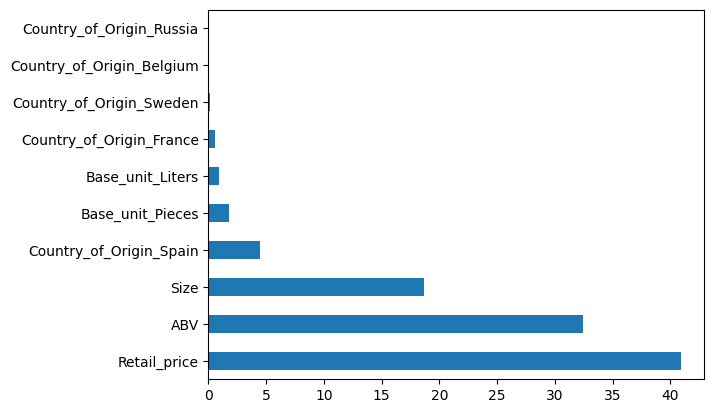

In [18]:
feat_importances = pd.Series(cat_grid.best_estimator_.feature_importances_, index=model_df.drop('target', axis=1).columns)
feat_importances.nlargest(10).plot(kind='barh')